# GRU CLASSIFICATION

## Import Library

In [32]:
pip install torchsummary


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from databits import CreateModel
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from torchsummary import summary

In [6]:
# Load the datasets

train = pd.read_csv("/kaggle/input/datatugasterakhirpba/ag_news_csv/train.csv",header=None,names=["label","title","description"])
test = pd.read_csv("/kaggle/input/datatugasterakhirpba/ag_news_csv/test.csv",header=None,names=["label","title","description"])
train['text'] = train['title'] + " " + train['description']
test['text'] = test['title'] + " " + test['description']
x_train = train['text'].tolist()
y_train = train['label'].tolist()
x_test = test['text'].tolist()
y_test = test['label'].tolist()

In [7]:
# Print untuk memastikan
print(f"Jumlah data di x_train: {len(x_train)}")
print(f"Contoh teks di x_train: {x_train[:2]}")
print(f"Contoh label di y_train: {y_train[:2]}")
print(f"Jumlah data di x_test: {len(x_test)}")
print(f"Contoh teks di x_test: {x_test[:2]}")
print(f"Contoh label di y_test: {y_test[:2]}")

Jumlah data di x_train: 120000
Contoh teks di x_train: ["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.']
Contoh label di y_train: [3, 3]
Jumlah data di x_test: 7600
Contoh teks di x_test: ["Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.", 'The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\\privately funded suborbital space flight, has officially ann

## Hyper Parameter

In [9]:
BATCH_SIZE = 32
SEQUENCE_LENGTH = 100
EPOCHS = 5
EMBED_DIM = 512
N_LAYERS = 2
DROPOUT_RATE = 0.1
NUM_CLASSES = len(np.unique(np.array(y_train)))
OPTIMIZER = torch.optim.Adam
LR = 0.001
LOSS = nn.CrossEntropyLoss

## Membuat Model

In [16]:
model = CreateModel(x_train, y_train,
                 x_test, y_test,
                 batch=BATCH_SIZE,
                 seq=SEQUENCE_LENGTH,
                 embedding_dim=EMBED_DIM,
                 n_layers=N_LAYERS,
                 dropout_rate=DROPOUT_RATE,
                 num_classes=NUM_CLASSES)

Loading setup data ...
Loading train data ...
Loading val data ...
Successful load model


In [17]:
model.GRU() # gru model

GRUModel(
  (embedding): Embedding(98639, 512)
  (gru): GRU(512, 512, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=512, out_features=4, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [18]:
model.GRU()
history = model.fit(epochs=EPOCHS, optimizer=OPTIMIZER, lr=LR, loss=LOSS)

Validation: 100%|██████████| 238/238 [00:02<00:00, 80.36batch/s]


Epoch 1/5 | Train Loss: 0.3599 | Train Acc: 0.8635 | Val Loss: 0.2381 | Val Acc: 0.9184



Validation: 100%|██████████| 238/238 [00:02<00:00, 79.89batch/s]


Epoch 2/5 | Train Loss: 0.1666 | Train Acc: 0.9435 | Val Loss: 0.2332 | Val Acc: 0.9209



Validation: 100%|██████████| 238/238 [00:03<00:00, 78.71batch/s]


Epoch 3/5 | Train Loss: 0.1025 | Train Acc: 0.9654 | Val Loss: 0.2425 | Val Acc: 0.9241



Validation: 100%|██████████| 238/238 [00:02<00:00, 79.62batch/s]


Epoch 4/5 | Train Loss: 0.0715 | Train Acc: 0.9758 | Val Loss: 0.2882 | Val Acc: 0.9138



Validation: 100%|██████████| 238/238 [00:02<00:00, 80.59batch/s]

Epoch 5/5 | Train Loss: 0.0563 | Train Acc: 0.9804 | Val Loss: 0.3079 | Val Acc: 0.9195

Restored model to the best state based on validation loss.


In [28]:
print(model.GRU())

GRUModel(
  (embedding): Embedding(98639, 512)
  (gru): GRU(512, 512, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=512, out_features=4, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [19]:
y_true, y_pred = model.eval() # no argumen needed

Validation: 100%|██████████| 238/238 [00:02<00:00, 83.27batch/s]


# Evaluasi Model
Compute Accuracy, Precisiom, Recall, F1, and Cofusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Akurasi: {accuracy:.4f}")


Precision: 0.9197
Recall: 0.9195
F1 Score: 0.9195
Akurasi: 0.9195


# Confussion Matrix

Confusion Matrix:
[[1746   32   70   52]
 [  23 1847   18   12]
 [  51   15 1699  135]
 [  44   15  145 1696]]


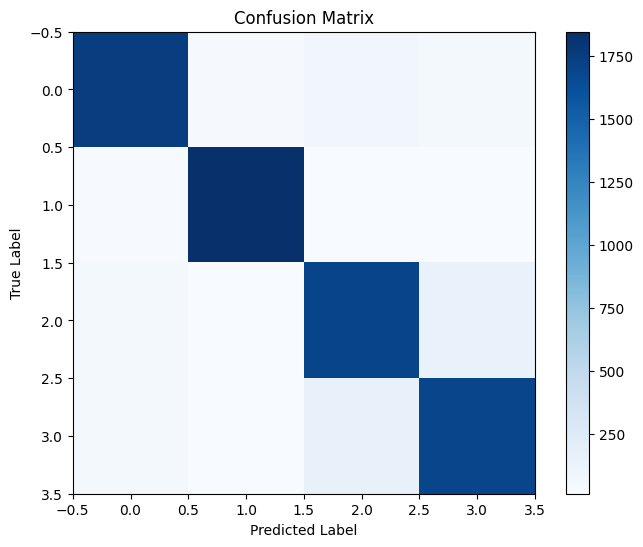

In [26]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()


# Predict untuk teks terbaru

In [48]:
class CreateModel:
    # ... kode model lainnya ...

    def predict(self, text):
        """
        Predict the label for a single input text.
        """
        # Tokenizer function (replace with the one used during training)
        tokenizer = lambda text: [ord(char) for char in text]  # Example tokenizer
        
        # Tokenize and pad/trim input
        tokens = tokenizer(text)
        if len(tokens) < self.seq_length:  # Assume self.seq_length is the sequence length
            tokens += [0] * (self.seq_length - len(tokens))  # Padding with 0
        else:
            tokens = tokens[:self.seq_length]

        # Convert to tensor
        input_tensor = torch.tensor([tokens], dtype=torch.long).to(self.device)

        # Make prediction
        self.model.eval()
        with torch.no_grad():
            output = self.model(input_tensor)
            predicted_label = torch.argmax(output, dim=1).item()  # Get the class index

        return predicted_label


In [49]:
text = "this is text"
pred = model.predict(text)  # or
pred = model(text)
print(f"Prediction for input text: {pred}")  # Text label in int format

Prediction for input text: tensor([3], device='cuda:0')
